# Custom Datasets

We've used some datasets with PyTorch Before.

But how do you get your own data into PyTorch

One of the ways to do so is via **Custom Datasets**

## Domain Libraries

Depending on what you're working on, vision, text, audio, recommendtion, you'll want to look into each exisiting data loading functions and customizable data loading functions.

Learning from:
* <https://www.learnpytorch.io/04_pytorch_custom_datasets/>

My Github Repo:
* <https://github.com/josemichaelrubio/my-pytorch-deep-learning>

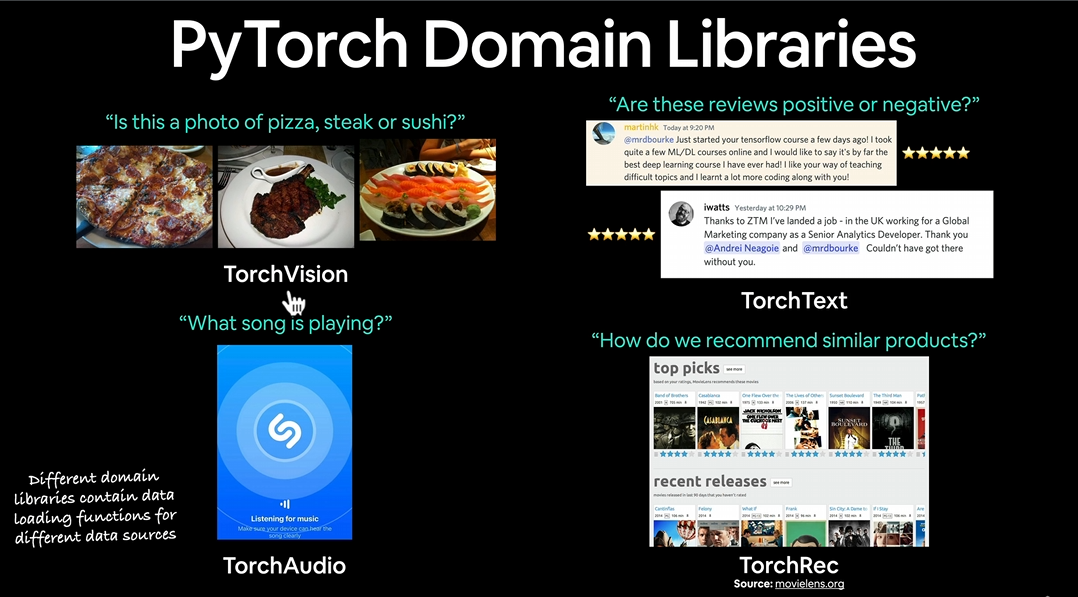

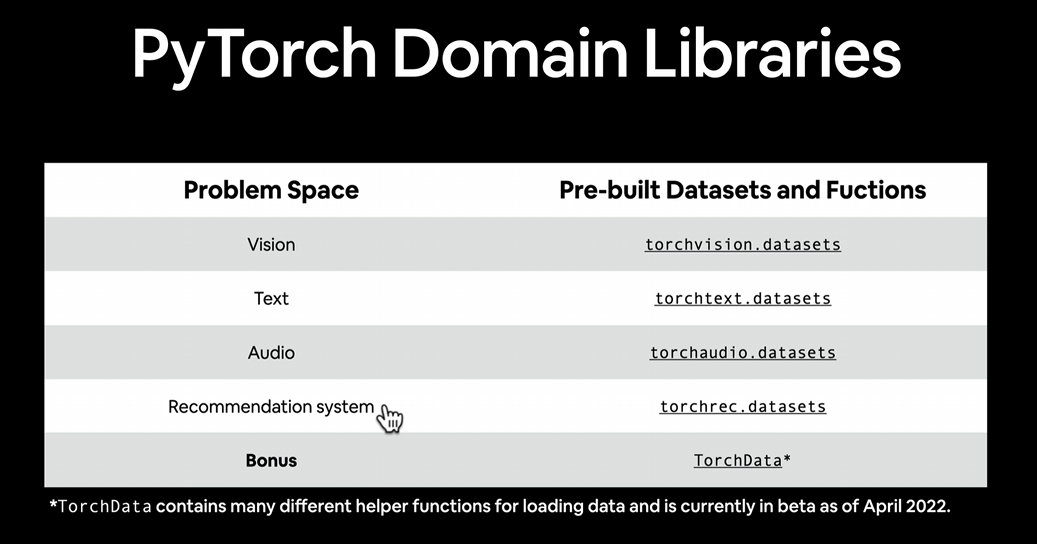

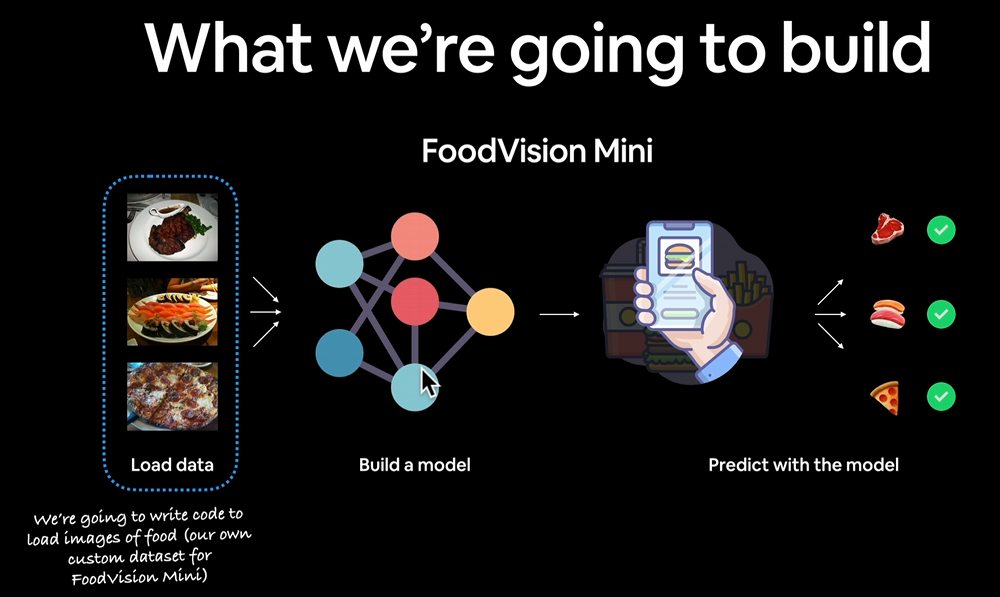

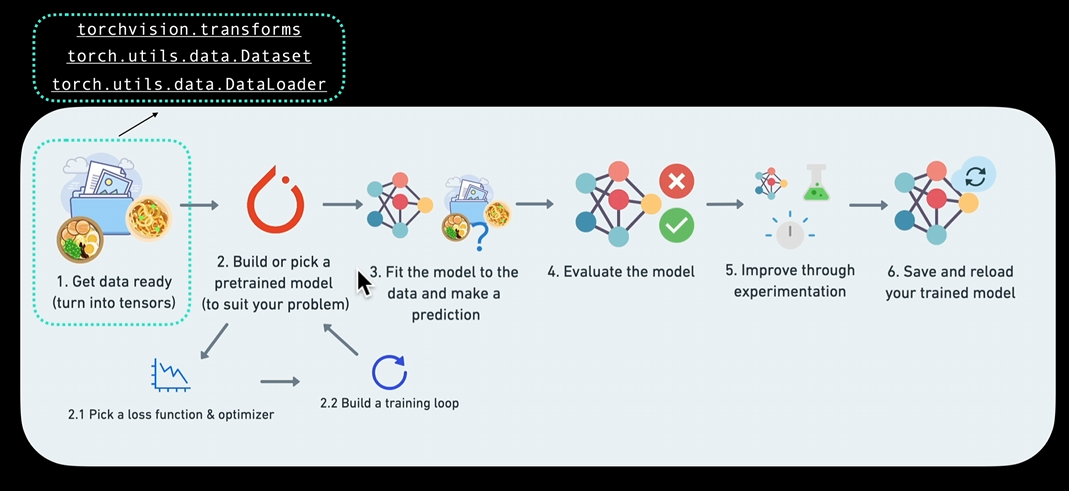

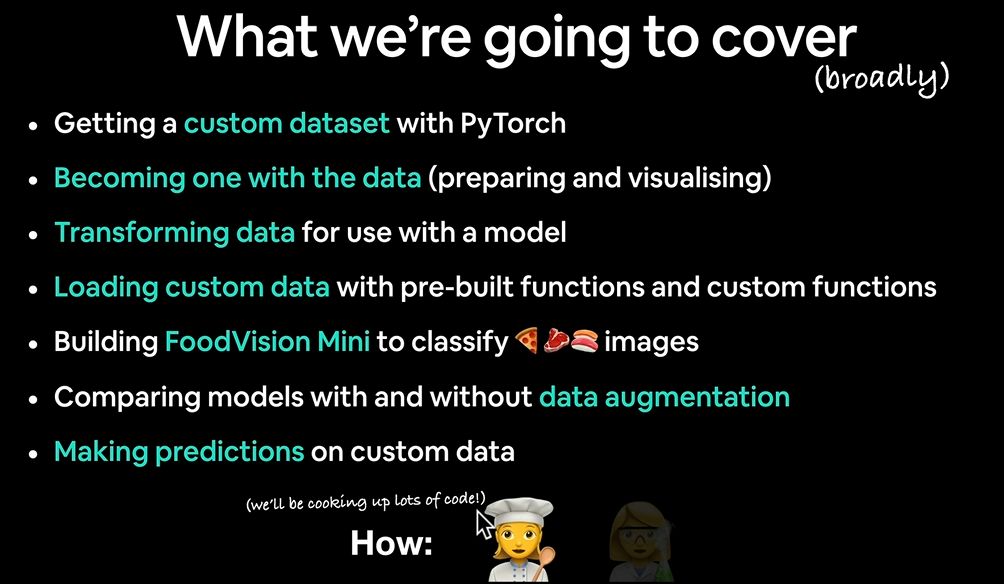

## 0. Importing PyTorch and Setting up Device-agnostic code

In [1]:
import torch
import torch as nn

# NOTE: PyTorch 1.10.0+ is requried for this notebook
torch.__version__

'2.5.1'

In [2]:
# Set up device-agnostic code
import subprocess

def get_device():
    if torch.cuda.is_available():
        subprocess.run(["nvidia-smi"])
        return "cuda"
    elif torch.backends.mps.is_available():
        return "mps"
    else:
        return "cpu"

device = get_device()
print(f"Using device: {device}")

Tue Dec 24 19:43:43 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.77.01              Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        On  |   00000000:01:00.0  On |                  N/A |
| 32%   33C    P8             20W /  153W |     812MiB /  12288MiB |     14%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Get Data

Downloaded "04_custom_data_creation.ipynb", which explains how the Food101 was srunk

Our dataset is a subset of the Food101 dataset

Food101 starts  101 different classes of food and 1000 images per class (750 training, 250 testing)

Start small to speed up how fast we experiment: Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing)

In [3]:
# request and import dataset from github
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder does not exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists. Skipping download.")
else:
    print(f"{image_path} directory does not exist. Downloading...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza_steak_sushi.zip
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza_steak_sushi.zip...")
    f.write(request.content)

# Unzip the data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza_steak_sushi.zip...")
    zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exists. Skipping download.
Unzipping pizza_steak_sushi.zip...


## 2. Becoming one with the data (data prepartion and data exploration)

In [4]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its directories, subdirectories, and files."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi/train/pizza'.


In [6]:
# Set up train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Standard image classification Data format
* <https://pytorch.org/vision/0.20/datasets.html#base-classes-for-custom-datasets>

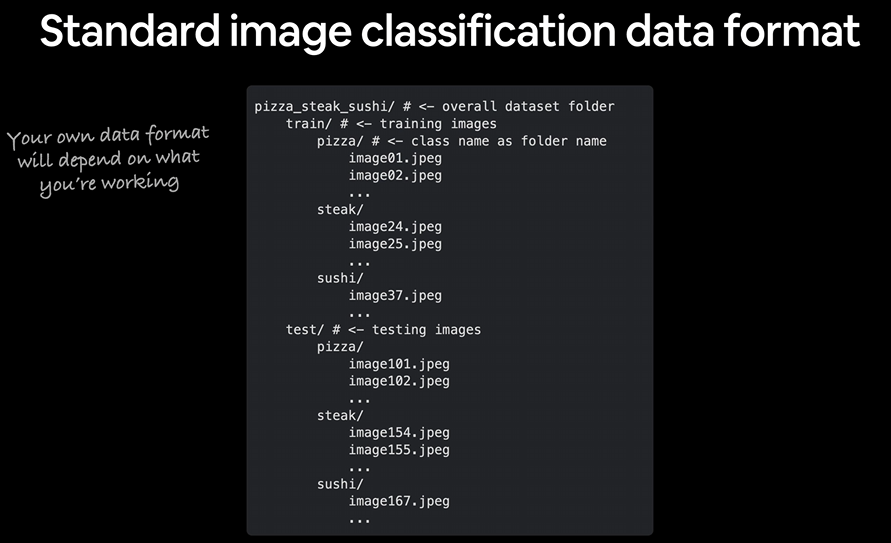

 Moving on to next module